Investigatnig a data set. Alex Challenor

Data import: Data set is: -TMDb movie data

Data location: https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000

Explanation of the data set: This data set contain data of 10866 diffrent films and key item of data about each one.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
from collections import Counter

master_data = pd.read_csv("tmdb-movies.csv")

In [2]:
master_data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
#find out how many data rows in data set.
len(master_data)

10866

Introduction:

I will use Jupyter Note book to investigate the data set and invesigate the follwing questions using python.

Question 1 - What is the most common film genre over the years from 1960-2015. This will be my 1D question.

Question 2 - What is the most common Film genre per year. This will be my 2D question.

Question 3 - Which Actor/actress was the most common in this data set. I will find the top 10 most common.

Question 4 - From the top 10 most common cast memebers which years did they do a film?

Data Wrangling:

To answer the questions i will need to "wrangle" the data to get it into a position where i can analyse it and draw a conclusion.

The following tasks are conducted in code cells below:

Convert date into a time/date format

Alow the python code to read the data as date format not a sting value
Spit out the diffrent genras from the Genres column
I used the same princlinple for the cast column

The Genrea column is filled with many values in a "string type". I will split the genres up into indivisual values which will allow for analysis later in project.
Check for any Genre cells with no data in

Use this knowledge when making a conclusion
Use "group by" to organise that data to allow a conclusion and graph to be made.

In [4]:
#change string to date format
master_data['release_date'] = pd.to_datetime(master_data['release_date'],)

master_data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
#Find out how many rows of data have no data in.
master_data['genres'].isnull().sum()

23

In [6]:
master_data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [7]:
#create a new table with the genre data delimitd and split

data_with_genres_split = master_data["genres"].str.split("|", n = 9, expand = True) 
data_with_genres_split.head(5)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [8]:
#Check this has worked on every data line. expected value is 10866

len(data_with_genres_split)

10866

In [9]:
#change column names to more usefull not just 0-4

data_with_genres_split.columns = ['genre1','genre2','genre3','genre4','genre5']
data_with_genres_split.head()

,genre1,genre2,genre3,genre4,genre5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [10]:
#concat the two tables to add indivdual genres columns on to the end of the dataframe
genres_concat = pd.concat([master_data, data_with_genres_split],axis=1)

genres_concat.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


In [11]:
#create a new list of all the genre values from table above
genre_list_new = pd.concat([genres_concat['genre1'],genres_concat['genre2'],genres_concat['genre3'],genres_concat['genre4'],genres_concat['genre5']], ignore_index=True)

genre_list_new.head()
len(genre_list_new)

54330

In [12]:
#have alist now of all the readings. pass this list into a function into it.

In [13]:
#totals of the grenre counts. Drama is top of the list so i suspect this will be very common for most common genre
genre_count = genre_list_new.value_counts()

print (genre_count)

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64


The data above states that Drama is the most popular genre over the sample times. More details in the conclusion

In [14]:
#Now sort the above list aphabeticaly
genre_sort = genre_count.rename_axis('genre')
genre_sort.sort_index(inplace = True)
print (genre_sort)

genre
Action             2385
Adventure          1471
Animation           699
Comedy             3793
Crime              1355
Documentary         520
Drama              4761
Family             1231
Fantasy             916
Foreign             188
History             334
Horror             1637
Music               408
Mystery             810
Romance            1712
Science Fiction    1230
TV Movie            167
Thriller           2908
War                 270
Western             165
dtype: int64


In [15]:
genres=genre_list_new.value_counts().index
for genre in genres:
    genres_concat[genre] = genres_concat['genres'].str.contains(genre)
    
genres_concat.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Fantasy,Mystery,Animation,Documentary,Music,History,War,Foreign,TV Movie,Western
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,False,False,False,False,False,False,False,False,False,False
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,False,False,False,False,False,False,False,False,False,False
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,False,False,False,False,False,False,False,False,False,False
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,True,False,False,False,False,False,False,False,False,False
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,False,False,False,False,False,False,False,False,False,False


In [16]:
#group the data for each year
genres_concat.groupby(['release_year'])['Action','Adventure','Animation','Comedy','Crime', 'Documentary','Drama','Family','Fantasy','Foreign','History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western'].sum()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,8,5,0,8,2,0,13,3,2,1,5,7,1,0,6,3,0,6,2,6
1961,7,6,1,10,2,0,16,5,2,1,3,3,2,1,7,4,0,0,2,3
1962,8,7,0,5,3,0,21,2,1,1,4,5,1,4,5,2,0,7,3,3
1963,4,7,1,13,4,0,13,3,2,2,4,9,0,6,8,2,0,10,1,2
1964,5,5,2,16,10,0,20,4,4,1,3,6,5,4,9,4,0,9,3,1
1965,9,6,1,7,2,0,20,3,0,1,4,5,2,3,5,2,1,11,8,4
1966,14,11,3,16,5,1,16,7,2,2,2,3,0,6,6,6,0,8,4,7
1967,7,7,2,17,7,1,16,3,3,0,0,4,5,3,11,4,0,5,1,2
1968,6,5,3,9,5,0,20,5,5,0,3,4,3,4,6,4,0,5,4,1


In [17]:
#create a new data frame with the desiered info
genre_answer = genres_concat.groupby(['release_year'])['Action','Adventure','Animation','Comedy','Crime', 'Documentary','Drama','Family','Fantasy','Foreign','History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western'].sum()


In [18]:
genre_answer.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,8,5,0,8,2,0,13,3,2,1,5,7,1,0,6,3,0,6,2,6
1961,7,6,1,10,2,0,16,5,2,1,3,3,2,1,7,4,0,0,2,3
1962,8,7,0,5,3,0,21,2,1,1,4,5,1,4,5,2,0,7,3,3
1963,4,7,1,13,4,0,13,3,2,2,4,9,0,6,8,2,0,10,1,2
1964,5,5,2,16,10,0,20,4,4,1,3,6,5,4,9,4,0,9,3,1


In [19]:
#run code to find the max value for each row
genre_answer.idxmax(axis=1)

release_year
1960     Drama
1961     Drama
1962     Drama
1963    Comedy
1964     Drama
1965     Drama
1966    Comedy
1967    Comedy
1968     Drama
1969     Drama
1970     Drama
1971     Drama
1972     Drama
1973     Drama
1974     Drama
1975     Drama
1976     Drama
1977     Drama
1978     Drama
1979     Drama
1980     Drama
1981     Drama
1982     Drama
1983     Drama
1984     Drama
1985    Comedy
1986     Drama
1987    Comedy
1988    Comedy
1989    Comedy
1990     Drama
1991     Drama
1992     Drama
1993     Drama
1994    Comedy
1995     Drama
1996     Drama
1997     Drama
1998     Drama
1999     Drama
2000     Drama
2001    Comedy
2002     Drama
2003    Comedy
2004     Drama
2005     Drama
2006     Drama
2007     Drama
2008     Drama
2009     Drama
2010     Drama
2011     Drama
2012     Drama
2013     Drama
2014     Drama
2015     Drama
dtype: object

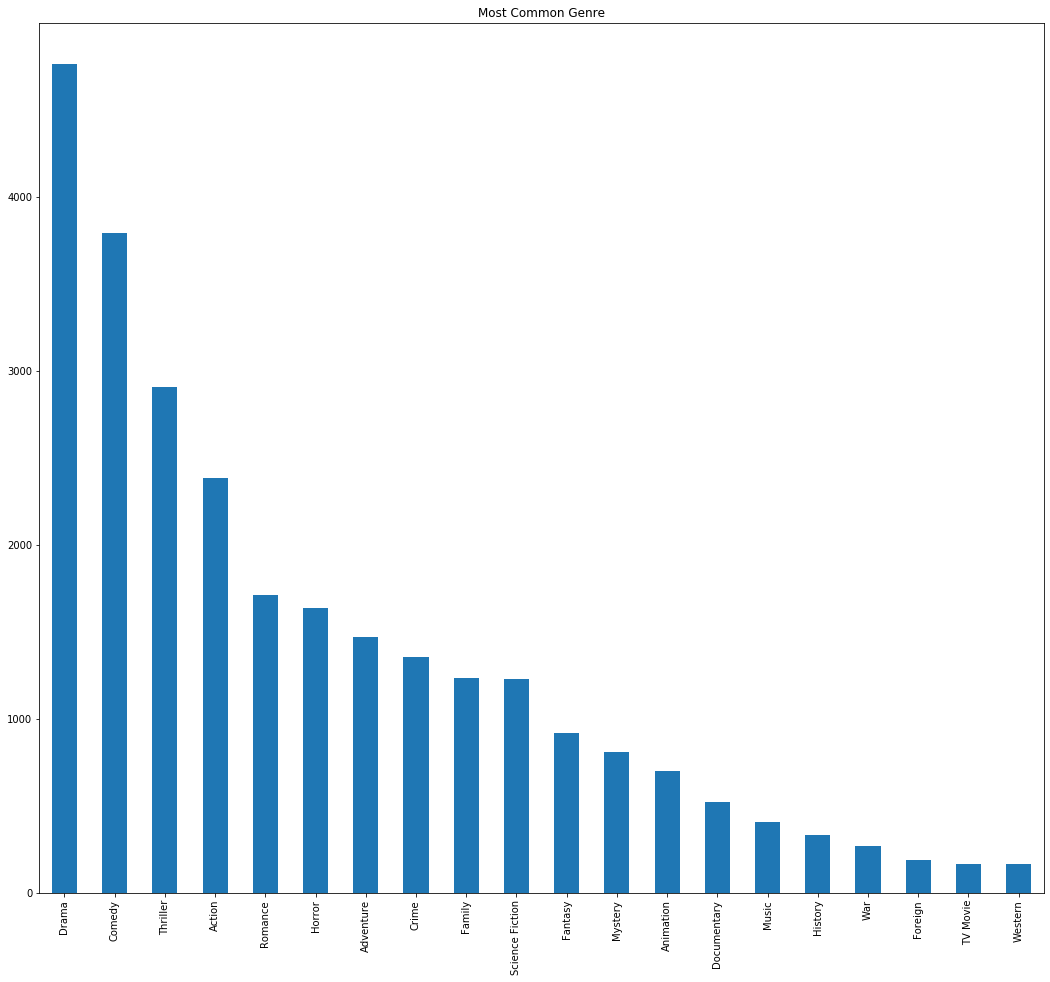

In [20]:
#Chart to show the most common genrea through out the total data set
%matplotlib inline
genre_count.plot.bar(figsize=(18, 16),title=('Most Common Genre'))

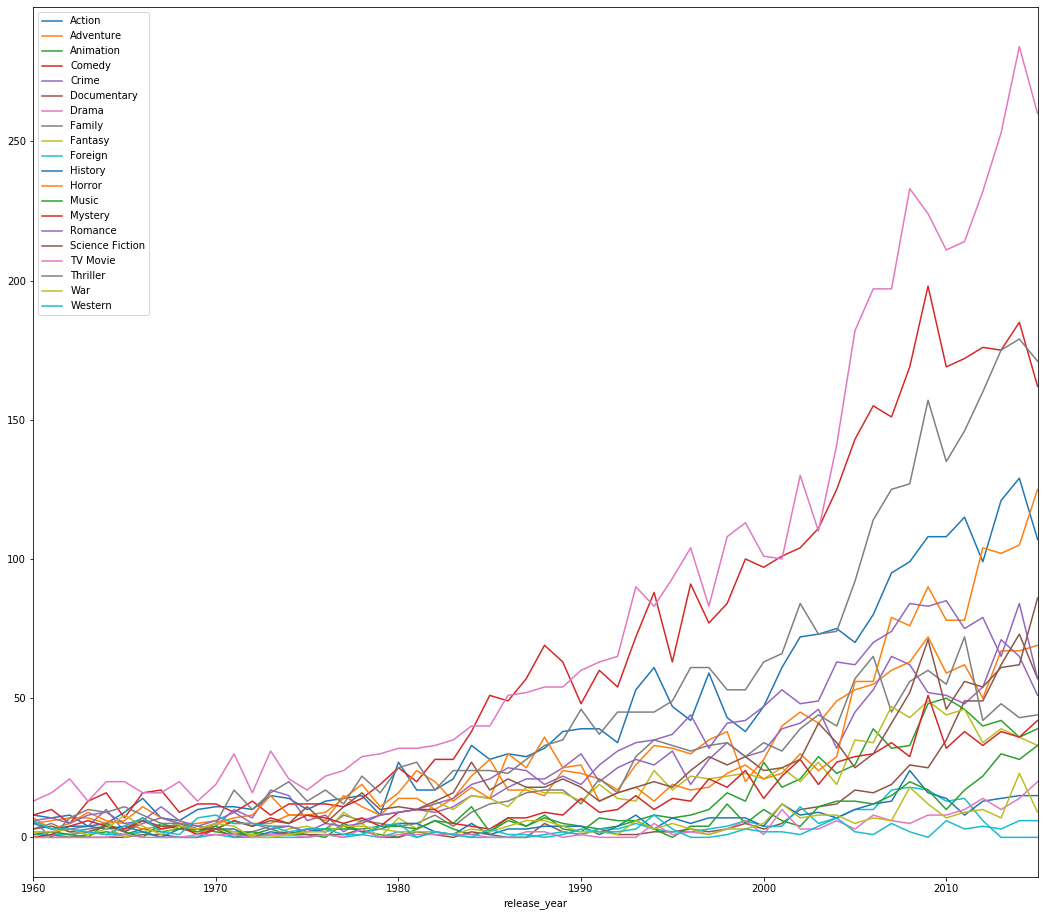

In [21]:
#plot the occurance of each genre per year
%matplotlib inline
genre_answer.plot.line(figsize=(18,16))

Question 1 and 2 -
Conclusion:

1d analysis - Drama is the most popular genre of the time period.

2d analysis - The most popular genre by year is drama except for the following years where it is comedy (1963, 1966, 1967, 1985, 1987 , 1988, 1989, 1994,2001, 2003)

Assumption/limitations there are 23 entrys of data where there is no Genre data. This means 0.2 % of all data is missing. This is a very low percntage and i am happ my colculsion will still stand.

The answer to the question over all is Drama is the most common genre. The table "genre_answer" shows for each year which was the most popular genre.

Following cells relate to question 3 and 4 about cast memebrs.

In [22]:
master_data_split = master_data["cast"].str.split("|") 
master_data_split.head()

0    [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...
1    [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...
2    [Shailene Woodley, Theo James, Kate Winslet, A...
3    [Harrison Ford, Mark Hamill, Carrie Fisher, Ad...
4    [Vin Diesel, Paul Walker, Jason Statham, Miche...
Name: cast, dtype: object

In [23]:
#create a new table with the cast data delimitd and split

cast_names_split = master_data["cast"].str.split("|", n = 6, expand = True)

cast_names_split.head()

,0,1,2,3,4
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [24]:
#change column names to more usefull not just 0-4
#this on e for cast

cast_names_split.columns = ['cast1','cast2','cast3','cast4','cast5']
cast_names_split.head()

,cast1,cast2,cast3,cast4,cast5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [25]:
cast_member_list = cast_names_split.values.tolist()
#print(cast_member_list)

In [26]:
len(cast_member_list)

10866

In [27]:
#concat the two tables to add indivdual  columns on to the end of the dataframe
#this one for cast members
cast_concat = pd.concat([master_data, cast_names_split],axis=1)

cast_concat.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast1,cast2,cast3,cast4,cast5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [28]:
# shows how many rows have no cast data in this column
master_data['cast'].isnull().sum()

76

In [29]:
#create a new list of all the genre values from table above
cast_list_new = pd.concat([cast_concat['cast1'],cast_concat['cast2'],cast_concat['cast3'],cast_concat['cast4'],cast_concat['cast5']], ignore_index=True)

cast_list_new.head()
len(cast_list_new)

54330

In [30]:
#totals of the cast counts. Robert De niro is top count and thus most popular actor
cast_count = cast_list_new.value_counts()

print (cast_count)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
                     ..
Bob Stephenson        1
Gerard Gonalons       1
Greyson Chadwick      1
Alex Haw              1
Ron Vischer           1
Length: 19026, dtype: int64


In [31]:
#Now sort the above list aphabeticaly
cast_sort = cast_count.rename_axis('cast')
cast_sort.sort_index(inplace = True)
print (cast_sort)

#this shows that there is some "dirty data" in the tables. some start with a space and some are just symbols.

cast
 Larry Mullen Jr.                      2
 Nicole MuÃ±oz                         1
 Therese Giehse                        1
"Weird Al" Yankovic                    1
50 Cent                               12
                                      ..
Äá»— Thá»‹ Háº£i Yáº¿n                 1
Å arÅ«nas Bartas                       1
Åžafak Sezer                           1
à¸ªà¸£à¸žà¸‡à¸©à¹Œ à¸Šà¸²à¸•à¸£à¸µ     1
é‚±æ·‘è²ž                              1
Length: 19026, dtype: int64


In [32]:
#Top 10 list
cast_count[0:9]

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
Morgan Freeman       49
John Goodman         49
dtype: int64

In [33]:
cast_count_top10 = cast_count[0:9]

In [34]:
#For each genre add Ture or False if that genre is applicable to the row.
cast_concat['Robert De Niro'] = cast_concat['cast'].str.contains('Robert De Niro')
cast_concat['Samuel L. Jackson'] = cast_concat['cast'].str.contains('Samuel L. Jackson')
cast_concat['Bruce Willis'] = cast_concat['cast'].str.contains('Bruce Willis')
cast_concat['Nicolas Cage'] = cast_concat['cast'].str.contains('Nicolas Cage')
cast_concat['Michael Caine'] = cast_concat['cast'].str.contains('Michael Caine')
cast_concat['Robin Williams'] = cast_concat['cast'].str.contains('Robin Williams')
cast_concat['John Cusack'] = cast_concat['cast'].str.contains('John Cusack')
cast_concat['Morgan Freeman'] = cast_concat['cast'].str.contains('Morgan Freeman')
cast_concat['John Goodman'] = cast_concat['cast'].str.contains('John Goodman')

cast_concat.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,cast5,Robert De Niro,Samuel L. Jackson,Bruce Willis,Nicolas Cage,Michael Caine,Robin Williams,John Cusack,Morgan Freeman,John Goodman
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Nick Robinson,False,False,False,False,False,False,False,False,False
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Josh Helman,False,False,False,False,False,False,False,False,False
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Miles Teller,False,False,False,False,False,False,False,False,False
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Daisy Ridley,False,False,False,False,False,False,False,False,False
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Dwayne Johnson,False,False,False,False,False,False,False,False,False


In [35]:
#group the data for each year
cast_concat.groupby(['release_year'])['Robert De Niro','Samuel L. Jackson','Bruce Willis','Nicolas Cage','Michael Caine', 'Robin Williams','John Cusack','Morgan Freeman','John Goodman'].sum()

,Robert De Niro,Samuel L. Jackson,Bruce Willis,Nicolas Cage,Michael Caine,Robin Williams,John Cusack,Morgan Freeman,John Goodman
release_year,,,,,,,,,
1960,0,0,0,0,0,0,0,0,0
1961,0,0,0,0,0,0,0,0,0
1962,0,0,0,0,0,0,0,0,0
1963,0,0,0,0,0,0,0,0,0
1964,0,0,0,0,1,0,0,0,0
1965,0,0,0,0,1,0,0,0,0
1966,0,0,0,0,3,0,0,0,0
1967,0,0,0,0,1,0,0,0,0
1968,0,0,0,0,0,0,0,0,0


In [36]:
cast_year_answer = cast_concat.groupby(['release_year'])['Robert De Niro','Samuel L. Jackson','Bruce Willis','Nicolas Cage','Michael Caine', 'Robin Williams','John Cusack','Morgan Freeman','John Goodman'].sum()

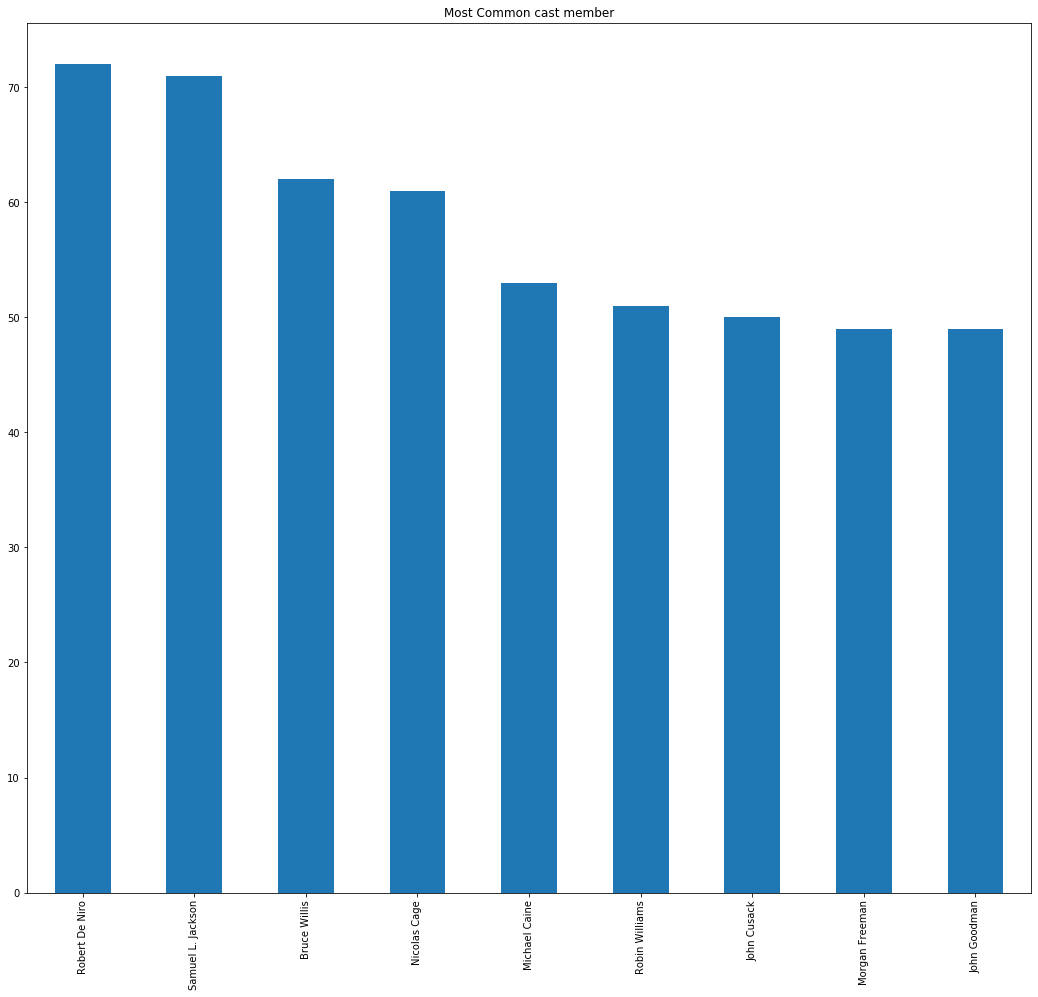

In [37]:
#Chart to show the most common genrea through out the total data set
%matplotlib inline
cast_count_top10.plot.bar(figsize=(18, 16),title=('Most Common cast member'))

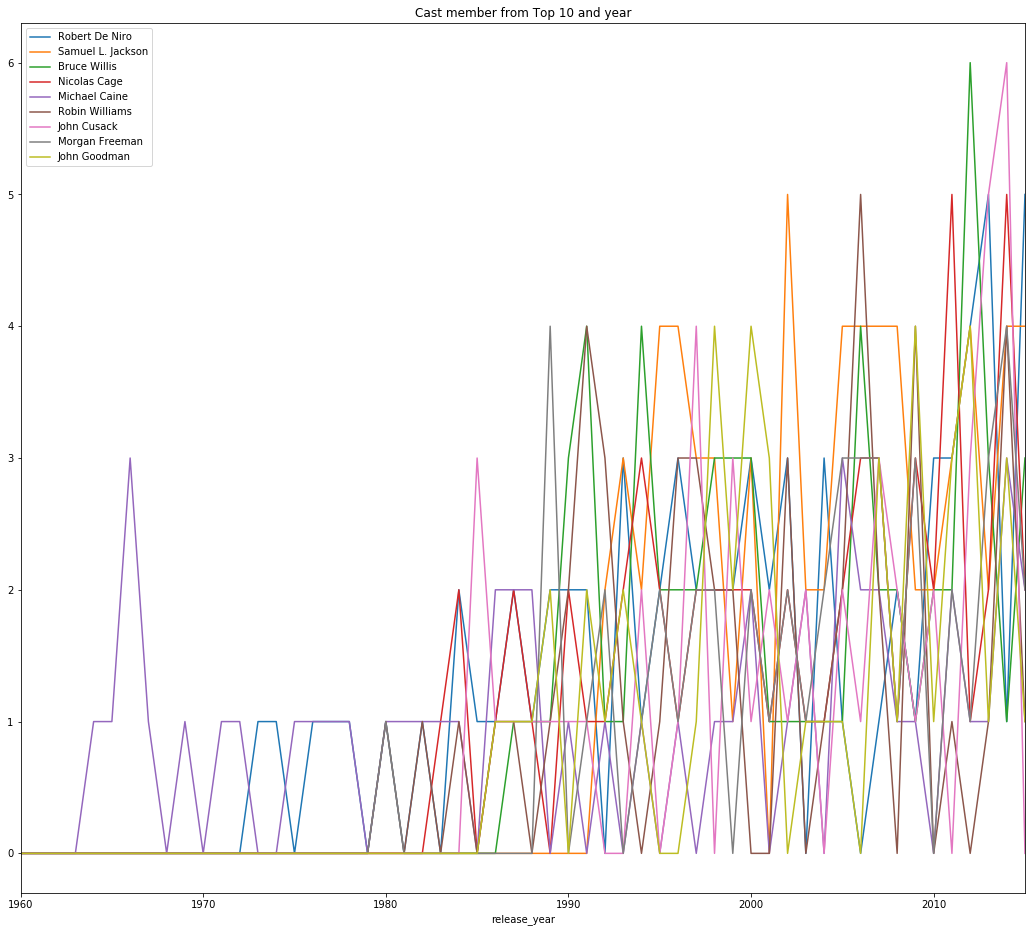

In [38]:
#plot the occurance of each genre per year
%matplotlib inline
cast_year_answer.plot.line(figsize=(18,16),title=('Cast member from Top 10 and year'))

Question 3 and 4 - Conclusion:

1d analysis - Robert De Niro is the most popular acor of this data set.

2d analysis - You can see where the cast members films were released.For the cast memebrs in teh top ten in this data set nearly all the films were released after 1990. Michel Cain has the longest run of films starting in the mid 19060's.

Assumption/limitations there are 76 entrys of data where there is no Genre data. This means 0.7 % of all data is missing. This is a very low percntage and i am happ my colculsion will still stand. In creating the lit of cast memebers and putting teh list into alphebetical order i found there was some "dirty data" and if i was going to do moe analysis on cast data this would need to be cleaned up. This data didnt effect my list of top ten so i am happy with my answers anc conclusions.

